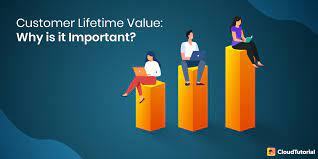

# **Customer Lifetime Value (CLTV) Prediction Project**

# **Introduction**

In today's data-driven business landscape, understanding and predicting customer behavior is of paramount importance. One key metric that assists businesses in assessing customer value and making informed decisions is Customer Lifetime Value (CLTV). CLTV represents the total revenue a business can expect from a customer throughout their entire relationship.

For this project, we explore the calculation of CLTV using a retail dataset. The dataset contains information about customer transactions, including recency, frequency, and monetary value (RFM). These three RFM components serve as the foundation for predicting the CLTV of each customer. Here's a brief overview of the dataset:

a. Recency (R): This metric measures how recently a customer made a purchase. It is typically defined as the time elapsed since the customer's last purchase.

b. Frequency (F): Frequency represents the number of purchases made by a customer within a specified time period. It reflects customer engagement and loyalty.

c. Monetary (M): Monetary value signifies the total amount of money spent by a customer on purchases. It provides insights into the customer's spending habits.

Our goal in this project is to utilize these RFM metrics to predict CLTV. To achieve this, we follow these steps:

1. Calculate the average order value for each customer by dividing monetary value by frequency.

2. Compute the total purchase frequency, which represents the collective purchasing behavior of all customers.

3. Determine the purchase frequency per customer, revealing the average number of transactions a typical customer makes.

4. Analyze the repeat rate, indicating the percentage of customers who make more than one purchase.

5. Calculate the churn rate, which represents the rate at which customers stop making purchases.

6. Introduce a profit margin assumption (e.g., 20%) to calculate the profit margin for each customer.

7. Finally, estimate the CLTV for each customer using the formula: avg_order_value * purchase_frequency / churn_rate.

# **Model Selection**

To predict CLTV, various approaches can be considered, including statistical models, machine learning algorithms, and customer segmentation techniques. The choice of model depends on the specific goals and characteristics of the dataset. In this project, we have opted for a straightforward calculation-based approach rather than a predictive model, as the goal is to estimate CLTV based on existing transaction data.



## clustering: Grouping the customer----Buying Pattern
##1)Recency,Frequency,Monetary
## 2) identify the business trend--day,month,season,timing......
## 3)Recommendation Engine
##4)Life time valuation of the customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
original_data=pd.read_excel("/content/Online_shopping.xlsx")

In [ ]:
df=original_data.copy()

In [ ]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# clustering: Grouping the customer----Buying Pattern
# Recency,Frequency,Monetary

In [ ]:
df["Country"].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [ ]:
# To solve the first problem statement: Only keep the required columns

In [ ]:
df1=df.drop(["StockCode","lower","Description","Country"],axis=1)
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [ ]:
# Finding the misssing values

In [ ]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [ ]:
# CustomerID contains so many missing values
# we could not retrive the customer id as customer is not willing to disclose the identity

In [ ]:
df1.dropna(axis=0,inplace=True)

In [ ]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [ ]:
# The quantity is -ve -----> Refund /Defective item

In [ ]:
# unit price is 0 means free item

In [ ]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [ ]:
df1=df1[df1["Quantity"]>0]

In [ ]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
df1.head(20)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
5,536365,2,2010-12-01 08:26:00,7.65,17850.0
6,536365,6,2010-12-01 08:26:00,4.25,17850.0
7,536366,6,2010-12-01 08:28:00,1.85,17850.0
8,536366,6,2010-12-01 08:28:00,1.85,17850.0
9,536367,32,2010-12-01 08:34:00,1.69,13047.0


In [ ]:
# Lets create a total price column------Qty*Unit Price

In [ ]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [ ]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
# We can drop unit price and qty becoz we have created a total column

In [ ]:
df2=df1.drop(['Quantity','UnitPrice'],axis=1)

In [ ]:
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [ ]:
# Groupby function will summerize the duplicate invoice no and sum the total value

In [ ]:
df_final =df2.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({"Total":"sum"}).reset_index()

In [ ]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
# Recency-----> Dataset last date - customer last purchase
# frequency:----->  no of time new invoice has generated w.r.t a customer
# Monetary:----> total of sum w.r.t customer id

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [ ]:
# Lets works on datetime data type

In [ ]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [ ]:
max (df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [ ]:
min (df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [ ]:
df_final.tail()

,InvoiceNo,InvoiceDate,CustomerID,Total
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20
18565,581587,2011-12-09 12:50:00,12680.0,249.45


In [ ]:
# approxiametely we have one year of dataset

In [ ]:
# lets make the benchmark of the last business date as +1 day extra .......i.e 10 dec 2011

In [ ]:
import datetime as dt
latest_date = dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
# Recency-----> Dataset last date - customer last purchase
# frequency:----->  no of time new invoice has generated w.r.t a customer
# Monetary:----> total of sum w.r.t customer id

In [ ]:
# To caluculate recency,Frequency and Monetary w.r.t to customer ID

In [ ]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [ ]:
RFM_score

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,277,1,180.60
4335,18281.0,180,1,80.82
4336,18282.0,7,2,178.05
4337,18283.0,3,16,2094.88


In [ ]:
# Rename the columns as per calculation we made

In [ ]:
RFM_score=RFM_score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [ ]:
RFM_score.head(2)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.6
1,12347.0,2,7,4310.0


In [ ]:
# We can assign the rank (marking_seheme)------using the rank function

In [ ]:
RFM_score["R_rank"]=RFM_score["Recency"].rank(ascending=False)
RFM_score["F_rank"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["M_rank"]=RFM_score["Monetary"].rank(ascending=True)

In [ ]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [ ]:
# lets calculate the percentile marks

In [ ]:
RFM=RFM_score.copy()

In [ ]:
RFM["R_final"]=(RFM["R_rank"]/RFM["R_rank"].max())*100
RFM["F_final"]=(RFM["F_rank"]/RFM["F_rank"].max())*100
RFM["M_final"]=(RFM["M_rank"]/RFM["M_rank"].max())*100


In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [ ]:
RFM=RFM.round(2)

In [ ]:
RFM

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0,8.21,17.20,13.00
4335,18281.0,180,1,80.82,860.0,746.5,105.0,19.90,17.20,2.42
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0,88.84,44.03,12.61
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0,94.04,96.39,80.41


In [ ]:
# Final sum of R F M marks

In [ ]:
RFM["RFM_SUM"]=0.20*RFM["R_final"]+0.30*RFM["F_final"]+0.50*RFM["M_final"]

In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387


In [ ]:
# Loyality categories----silver,gold,diamond,platinum

In [ ]:
quant100=RFM["RFM_SUM"].quantile(q=[0.25,0.50,0.75])
quant100

0.25    27.7225
0.50    48.7810
0.75    71.4875
Name: RFM_SUM, dtype: float64

In [ ]:
quant200=RFM["RFM_SUM"].quantile(q=[0.20,0.60,0.80])
quant200

0.2    24.0874
0.6    57.8362
0.8    76.0636
Name: RFM_SUM, dtype: float64

In [ ]:
# Visualization ----emperical cumulative distribution function------seaborn

<Axes: xlabel='RFM_SUM', ylabel='Proportion'>

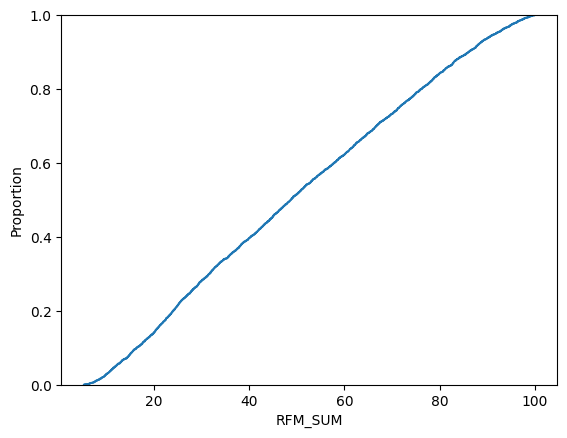

In [ ]:
sns.ecdfplot(data=RFM["RFM_SUM"])

In [ ]:
min(RFM["RFM_SUM"])

5.371999999999999

In [ ]:
max(RFM["RFM_SUM"])

99.92099999999999

In [ ]:
# ----Lets Assign the loyality as per percentile

In [ ]:
def loyality(x):
  if x<=25:
    return "silver"
  elif x<=55:
    return "Gold"
  elif x<=77:
    return"Diamond"
  else:
    return "Platinum"

In [ ]:
# use the above function
RFM["Loyality"]=RFM["RFM_SUM"].apply(loyality)

In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387,silver


In [ ]:
RFM["Loyality"].value_counts()

Gold        1552
Diamond     1029
silver       928
Platinum     830
Name: Loyality, dtype: int64

In [ ]:
# ----We scan do the clustering------Use of alogorithms

In [ ]:
# K-Means clustering

In [ ]:
Newdata=RFM["RFM_SUM"]
Newdata.head(2)

0    55.807
1    91.021
Name: RFM_SUM, dtype: float64

In [ ]:
Newdata=pd.DataFrame(Newdata)

In [ ]:
Newdata.head(2)

,RFM_SUM
0,55.807
1,91.021


In [ ]:
# K-means clustering algorithms

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans1=KMeans(max_iter=200,random_state=100,n_clusters=4)
y_means=kmeans1.fit_predict(Newdata)

In [ ]:
y_means

array([1, 3, 1, ..., 2, 3, 1], dtype=int32)

In [ ]:
RFM["Cluster"]=kmeans1.labels_
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807,Diamond,1
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021,Platinum,3
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973,Diamond,1
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107,Diamond,1
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387,silver,0


In [ ]:
RFM["Cluster"].value_counts()

0    1235
2    1122
1    1030
3     952
Name: Cluster, dtype: int64

In [ ]:
# Evaluation of clustring

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# # silhoutte score range is -1 to +1
# if our value is less than  0 that means the element in a cluster is not properly selected
# if it is 0  that means there is some overlapping in the cluster
# if the value is 0.5 to 1 we can say clustering is ok

In [ ]:
labels=kmeans1.labels_
silhouette_score(Newdata,labels)

0.5633325208789345

## 2) identify the business trend--day,month,season,timing......

In [ ]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
df_final1=df_final.copy()

In [ ]:
df_final1

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [ ]:
# Extraction of day,month,time from datetime column

In [ ]:
import datetime as dt

In [ ]:
df_final1["Day"]=df_final1["InvoiceDate"].dt.day_name()
df_final1["Month_name"]=df_final1["InvoiceDate"].dt.month_name()
df_final1["Month"]=df_final1["InvoiceDate"].dt.month
df_final1["Hour"]=df_final1["InvoiceDate"].dt.hour


In [ ]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,December,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,December,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,December,12,8


In [ ]:
df_final1["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [ ]:
# Saturday is off day

In [ ]:
df_final1["Month"].value_counts()

11    2660
12    2179
10    1930
9     1757
5     1559
6     1394
7     1331
3     1324
8     1283
4     1153
2     1003
1      993
Name: Month, dtype: int64

In [ ]:
df_final1["Hour"].value_counts()

12    3133
13    2639
11    2279
14    2278
10    2230
15    2045
9     1395
16    1105
8      555
17     546
18     169
19     144
7       29
20      18
6        1
Name: Hour, dtype: int64

In [ ]:
# Create the season-----summer,winter,monsoon

In [ ]:
def cal_season(x):
  if x in [10,11,12,1]:
    return "Winter"
  elif x in [2,3]:
    return "Spring"
  elif x in [4,5,6]:
    return "Summer"
  else:
    return "Monsoon"


In [ ]:
def cal_timing(x):
  if x in range(1,4):
    return "late night"
  elif x in range(4,12):
    return "Morning"
  elif x in range(12,16):
    return "Afternoon"
  else:
    return "Evening"


In [ ]:
df_final1["Season"]=df_final1["Month"].apply(cal_season)

In [ ]:
df_final1["Timing"]=df_final1["Hour"].apply(cal_timing)

In [ ]:
df_final1["Timing"].value_counts()

Afternoon    10095
Morning       6489
Evening       1982
Name: Timing, dtype: int64

In [ ]:
# creation of weekend/weekdays

In [ ]:
df_final1["Weekend"]=np.where((df_final1.Day=="Saturday")|(df_final1.Day=="Sunday"),"Weekend","Weekday")

In [ ]:
df_final1.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour,Season,Timing,Weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,12,8,Winter,Morning,Weekday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,12,8,Winter,Morning,Weekday


In [ ]:
# EDA

In [ ]:
# analysis of the no of invoice generated day wise

In [ ]:
day_count =df_final1.groupby("Day")["InvoiceNo"].count().to_frame("invoice_count").reset_index()

In [ ]:
day_count

,Day,invoice_count
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


In [ ]:
# Thursday many invoice generated by the customer compare to other days

In [ ]:
Season_count =df_final1.groupby("Season")["InvoiceNo"].count().to_frame("invoice_count").reset_index()

In [ ]:
Season_count

,Season,invoice_count
0,Monsoon,4371
1,Spring,2327
2,Summer,4106
3,Winter,7762


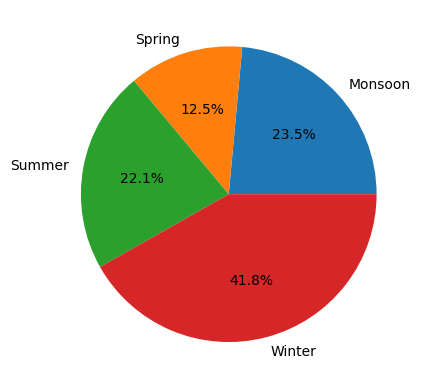

In [ ]:
plt.pie(Season_count.invoice_count,labels=Season_count.Season,autopct="%.1f%%")
plt.show()

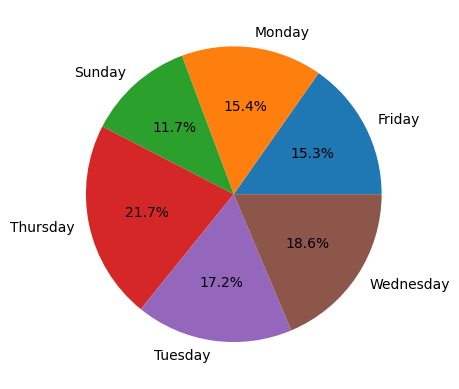

In [ ]:
plt.pie(day_count.invoice_count,labels=day_count.Day,autopct="%.1f%%")
plt.show()

**# Recommendation Engine**

In [ ]:
# Data filteration appraoach ---use in product recommendation,service.....,movie,songs

In [ ]:
# Collaborative filtering------find the similarity between the users
# You have watched  movie  A,C,D,F
# one another user has watched the movie A,C,D,X

# For U recommended movie is X
# and for other user recommended movie is F

In [ ]:
# Content based filtering-----work on the principle of product description
# Movie:Tags,storyline,Book Contenrs,comments(user)

In [ ]:
# # Hybrid filteration:
# both meta(collaborative filtering and content based )

In [ ]:
# We are using collaborative filtering approach -in online shopping recommendation

In [ ]:
df100=original_data.copy()

In [ ]:
df100.head(5)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df100.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df100=df100.drop(["lower"],axis=1)

In [ ]:
df100=df100.dropna(axis=0)

In [ ]:
df100.shape

(406829, 8)

In [ ]:
# Collaborative filtering approach------Degree of similarity between the customers

In [ ]:
# To apply the function to find out the degree of similarity

In [ ]:
# WE required a pivot table(matrix)--------stock code,customer id

In [ ]:
custID_matrix=df100.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum")

In [ ]:
custID_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# We can apply the mapping approach to change nan---->0

In [ ]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)
custID_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We can apply the function______> cosine similarity to calculate the degree of similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(custID_matrix)

In [ ]:
similarity.shape

(4372, 4372)

In [ ]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [ ]:
similarity[100]

array([0.        , 0.14481324, 0.08703883, ..., 0.0942809 , 0.18628514,
       0.1062988 ])

In [ ]:
sorted(similarity[100],reverse=True)

[0.9999999999999996,
 0.32688969261277073,
 0.27343962911259007,
 0.26903708365381973,
 0.26827744801910997,
 0.2629502940535667,
 0.25333333333333335,
 0.2527226527352203,
 0.24930009553630061,
 0.24930009553630061,
 0.24911966213168743,
 0.24870800168690355,
 0.24850429767895826,
 0.2461829819586655,
 0.24494897427831783,
 0.24221202832779937,
 0.2413346726900722,
 0.24071739063762815,
 0.24053511772118197,
 0.24019223070763074,
 0.23624164222061245,
 0.23333333333333336,
 0.23268467259951844,
 0.232379000772445,
 0.23165620275160329,
 0.23115869750961876,
 0.2307082566667037,
 0.2277339348846351,
 0.2276096821334301,
 0.22658813492955773,
 0.22566921470262752,
 0.2239171473757401,
 0.22259728109199708,
 0.22135943621178658,
 0.22000763928677075,
 0.21945205394367925,
 0.21543753928536533,
 0.21538744758532144,
 0.21486575084548035,
 0.21437688030314891,
 0.21398024625545647,
 0.21333333333333337,
 0.21329967236760186,
 0.2124429424543694,
 0.212267452202093,
 0.21192517713040704,
 0

In [ ]:
final=pd.DataFrame(similarity)

In [ ]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
final.columns=custID_matrix.index

In [ ]:
final

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4369,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4370,0.0,0.109364,0.170905,0.137124,0.044866,0.072870,0.0,0.113354,0.034204,0.093170,...,0.0,0.0,0.017102,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [ ]:
final=final.set_index(custID_matrix.index)

In [ ]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
# For example we want to see the highest similar customer---w.r.t to cust id 12347

In [ ]:
final.loc[12347].sort_values(ascending=False)

CustomerID
12347.0    1.000000
17396.0    0.301694
13324.0    0.256186
13759.0    0.241355
16855.0    0.226050
             ...   
15049.0    0.000000
16965.0    0.000000
16963.0    0.000000
16961.0    0.000000
12346.0    0.000000
Name: 12347.0, Length: 4372, dtype: float64

In [ ]:
# Customer id 12347 has the highest degree of similarity with cust id 17396

In [ ]:
# lets A----12347
# b-----17396

In [ ]:
# item purchased-----cust A
# item purchased -----cust B

In [ ]:
item_cust_A=set(custID_matrix.loc[12347].iloc[custID_matrix.loc[12347].to_numpy().nonzero()].index)


In [ ]:
len(item_cust_A)

103

In [ ]:
item_cust_B=set(custID_matrix.loc[17396].iloc[custID_matrix.loc[17396].to_numpy().nonzero()].index)

In [ ]:
len(item_cust_B)

24

In [ ]:
Recommended_item_cust_A=item_cust_B-item_cust_A

In [ ]:
Recommended_item_cust_A

{22141, 22142, 22144, 22191, 22192, 22193, 22730, 23245, 'M'}

# finding the lifetime valuation of customer

In [ ]:
# Customer life time evaluation ----it is a marking scheme
# Quantitative analysis in Business senario.......sales promotion will be decided on Customer life time evaluation

In [ ]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [ ]:
df200=RFM_score.copy()

In [ ]:
# average order value ---------contribution in business of a particular customer

In [ ]:
df200["avg_order_value"]=df200["Monetary"]/df200["Frequency"]

In [ ]:
df200.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,avg_order_value
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,77183.600000
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,615.714286
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,449.310000
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,1757.550000
4,12350.0,310,1,334.40,227.5,746.5,1230.0,334.400000


In [ ]:
sum(df200["Frequency"])

18566

In [ ]:
# Purchase Frequency

In [ ]:
purchase_frequency=sum(df200['Frequency'])/df200.shape[0]

In [ ]:
purchase_frequency

4.278866098179304

In [ ]:
# Repeat rate

In [ ]:
Repeat_rate=df200[df200["Frequency"]>1].shape[0]/df200.shape[0]

In [ ]:
Repeat_rate

0.6561419681954367

In [ ]:
# 65% customer has purchased more than 1

In [ ]:
churn_rate=1-Repeat_rate


In [ ]:
churn_rate

0.3438580318045633

In [ ]:
# Chances that about 34% customers are likely to churn

In [ ]:
# Profit margin and life time valuation

In [ ]:
df200["profit_margin"]=df200["Monetary"]*0.20
# customer_value

In [ ]:
df200.head(2)

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,avg_order_value,profit_margin,cltv
0,12346.0,325,1,77183.6,162.5,746.5,4330.0,77183.600000,15436.72,100723.323090
1,12347.0,2,7,4310.0,4156.5,3709.5,4004.0,615.714286,862.00,803.496973


In [ ]:
df200["cltv"]=df200["avg_order_value"]*purchase_frequency/churn_rate

In [ ]:
df200.head(2)

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,avg_order_value,profit_margin,cltv
0,12346.0,325,1,77183.6,162.5,746.5,4330.0,77183.600000,15436.72,960449.542627
1,12347.0,2,7,4310.0,4156.5,3709.5,4004.0,615.714286,862.00,7661.763692


# Conclusion

In this project, we leveraged RFM analysis and related metrics to estimate Customer Lifetime Value (CLTV) for a retail dataset. By breaking down the analysis into several steps, we were able to gain insights into customer purchasing behavior and, subsequently, their potential lifetime value to the business.

Key findings and insights from the project include:

a. The average order value, representing the monetary value per transaction, ranged widely among customers.

b. The repeat rate indicated that a significant proportion of customers made multiple purchases, contributing positively to CLTV.

c. The churn rate, representing customer attrition, was calculated, highlighting the importance of retaining existing customers.

d. The estimated CLTV for each customer provides valuable information for decision-making, particularly in tailoring marketing strategies, identifying high-value customers, and optimizing resources.

Overall, this project demonstrates how RFM analysis and CLTV estimation can be valuable tools for businesses seeking to understand and maximize the value of their customer base. These insights can inform strategies for customer retention, segmentation, and targeted marketing efforts, ultimately contributing to the growth and success of the business.
